# NOT IMPLEMENTED

Might combine explore and cleaning

In [3]:
import psycopg2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np  
import random
import pandas as pd
import seaborn as sns

In [4]:
# usage: specify file location
filepath = '../Data_git_ignore/clean_corpus_25k.csv'
# filepath = '../Data_git_ignore/clean-100k.csv'

# Create df for the entire file
df = pd.read_csv(filepath, index_col = [0])

In [5]:
# get content_tokenize as series of lists
regex = r" *['\"\[\]]+"
df['content_tokenize'] = df['content_tokenize'].replace(to_replace=regex, value='', regex=True).str.split(',')

In [6]:
df['content'].iloc[0]

'we are witnessing a great turning inward in the global war on terror by fascist us authorities and their corrupt collaborators in the corporate world and in other governments the sword of the totalitarian state is no longer directed against alqaeda which is now unofficially a us ally in the war against syria but against internal critics who are being labeled domestic extremists and homegrown terrorists internal critics were dismissed by the establishment as crazy conspiracy theorists and paranoid loons but the truth about DATE has spread so widely in society that these terms no longer perform the function of thought control the defeat of the propaganda system has put the tyrants in washington in a tough spot because they want to retain control over the american people but they can no longer do so with word ricks and media brainwashing as a result the failed terrorist state in washington is making america a closed society with a vast secret police domestic kill list and military facili

In [14]:
# df['content_tokenize'].loc[df['type'] == 'bias'].explode().value_counts()[:30].index.tolist()



In [15]:
text = " ".join(review for review in fake_words)

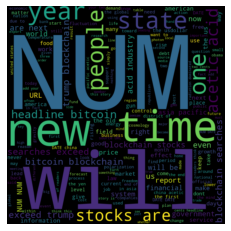

In [26]:
# get all words form type=fake
fake_words = df['content'].loc[df['type'] == 'fake'].head(50)

# text used by wordcloud
text = " ".join(review for review in fake_words)


# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

 
# Create the wordcloud object
wordcloud = WordCloud(width=960, height=960, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [23]:
def display_wordcloud(top_words, title, n_components):
    plt.figure()
    j = np.ceil(n_components/4)
    for t in range(n_components):
        i=t+1
        plt.subplot(j, 4, i).set_title("Topic #" + str(t))
        plt.plot()
        plt.imshow(WordCloud().fit_words(top_words[t]))
        plt.axis("off")
    fig.suptitle(title)
    plt.show()

display_wordcloud(top_words=[text], title="test", n_components=1)

AttributeError: 'str' object has no attribute 'items'

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171649 entries, 1496 to 1706
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                171649 non-null  float64
 1   domain            171649 non-null  object 
 2   type              171649 non-null  object 
 3   url               171649 non-null  object 
 4   content           171649 non-null  object 
 5   scraped_at        171649 non-null  object 
 6   inserted_at       171649 non-null  object 
 7   updated_at        171649 non-null  object 
 8   title             171434 non-null  object 
 9   authors           84560 non-null   object 
 10  keywords          0 non-null       float64
 11  meta_keywords     24862 non-null   object 
 12  meta_description  54711 non-null   object 
 13  tags              71982 non-null   object 
 14  summary           0 non-null       float64
 15  source            0 non-null       float64
 16  type_id           1

In [1]:
import psycopg2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np  
import random
import pandas as pd
import seaborn as sns

In [4]:
def execQuery(query):
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "root",
                                      host = "localhost",
                                      port = "5432",
                                      database = "postgres")
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")

In [16]:
tokens = execQuery(
"""
SELECT  content_tokenize FROM fakenews.article LIMIT 3;
""")

Executed query and closed connection.


In [42]:
len(tokens)
type(tokens)
len(tokens[0])
type(tokens[0])
for t in tokens[:][0][:]:
    print("################->", t)

TypeError: list indices must be integers or slices, not list

In [24]:
#Domains with fake articles after 2018-01-15
execQuery(
"""
SELECT DISTINCT domain_name.domain_name FROM domain_name
INNER JOIN article
ON article.domain_id = domain_name.domain_id
WHERE article.type_id = '7' and scraped_at >= '2018-01-15'

""")

Executed query and closed connection.


[('rickwells.us',),
 ('thecommonsenseshow.com',),
 ('stormcloudsgathering.com',),
 ('dcgazette.com',),
 ('teaparty.org',),
 ('bighairynews.com',),
 ('newslo.com',),
 ('therightscoop.com',),
 ('theinternetpost.net',),
 ('vigilantcitizen.com',),
 ('usatoday.com.co',),
 ('newswithviews.com',),
 ('gopthedailydose.com',),
 ('downtrend.com',),
 ('conservativedailypost.com',),
 ('viralliberty.com',),
 ('weeklyworldnews.com',),
 ('conservativefighters.com',),
 ('coed.com',),
 ('beforeitsnews.com',),
 ('americannews.com',)]

In [29]:
execQuery(
"""
Select COUNT(authorid), domain_name
from 


""")

Executed query and closed connection.


[(Decimal('211'),)]

In [2]:
conn = psycopg2.connect(database='Database1', user ='postgres',password='detminkode', host ='localhost', port='5432')

In [3]:
q4_1 = """SELECT sum(length(content))/COUNT(id) as AvgLen, type
from article
Inner join type
ON article.type_id = type.type_id
GROUP BY type
ORDER BY AvgLen ASC """

In [9]:
q4_1

'Select Count(id)\nfrom article'

In [4]:
df = pd.read_sql_query(q4_1, conn)
df

,avglen,type
0,334,hate
1,1711,clickbait
2,1869,unreliable
3,2603,reliable
4,2655,None
5,2719,bias
6,2779,junksci
7,3977,political
8,3993,fake
9,4958,conspiracy


In [5]:
#test dataframe
df1 = pd.DataFrame()

df1['x'] = random.sample(range(1, 100), 25)
df1['y'] = random.sample(range(1, 100), 25)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

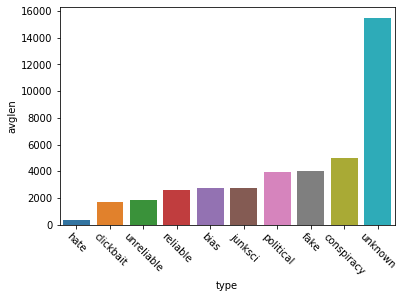

In [15]:
sns.barplot(x='type', y='avglen', data=df)
plt.xticks(rotation = -45)